In [1]:
import pandas as pd
import numpy as np

In [2]:
# display max row & columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_excel(r"H:\CampusX_DS\week43 - My Projects Aug 2024\used_car_price_prediction\Used-Car-Price-Prediction\src\notebook\data\raw_data\cars24_final_data_1.xlsx")

## cleaning required

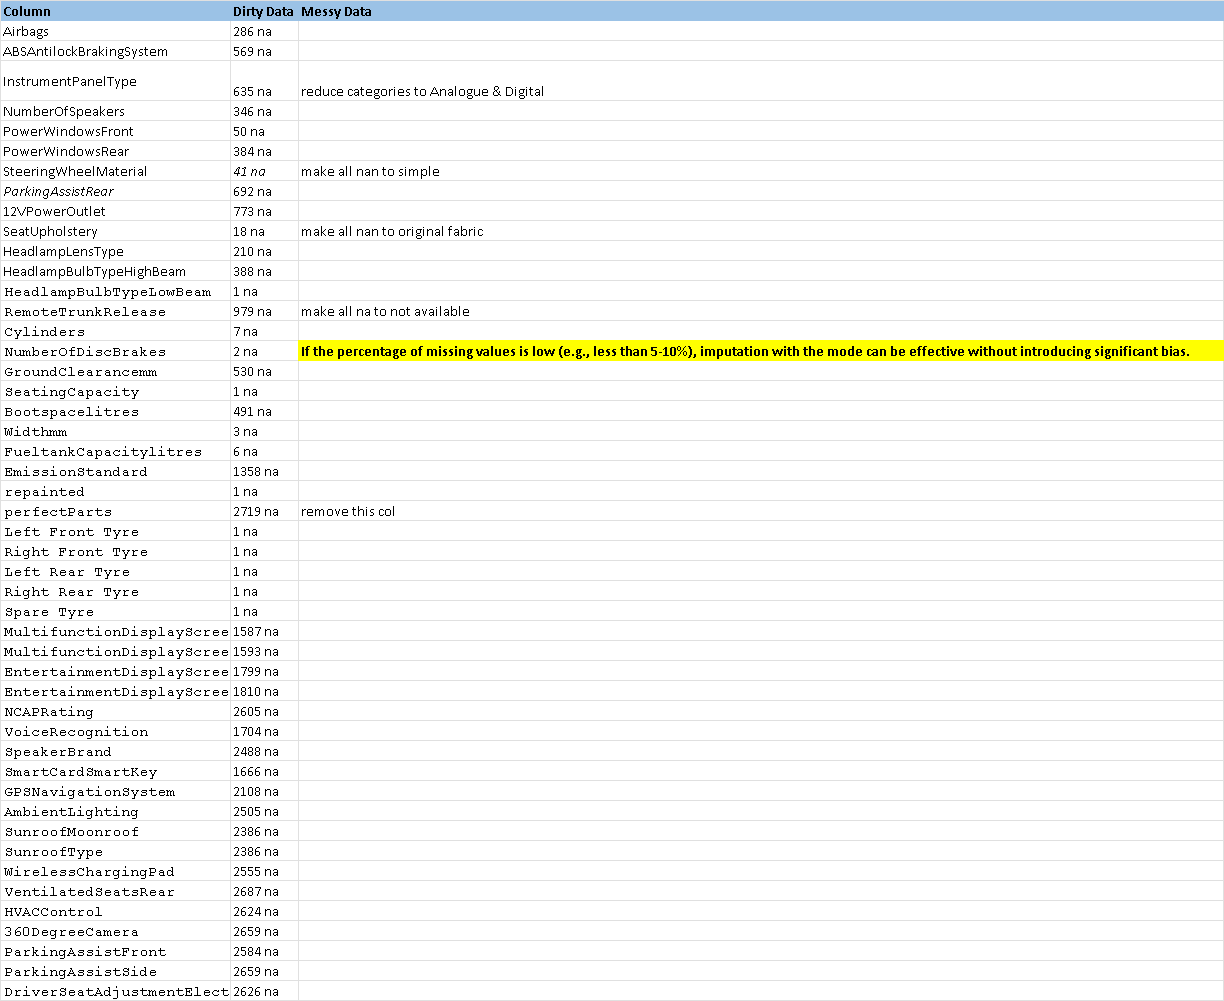

- change date format for : content.insuranceExpiry	content.lastServicedAt

## handling missing values

In [4]:
df['SteeringWheelMaterial'].isna().sum()

41

In [5]:
df['SteeringWheelMaterial'] = df['SteeringWheelMaterial'].fillna("Simple")

In [6]:
df['SteeringWheelMaterial'].isna().sum()

0

In [7]:
df['SeatUpholstery'].isnull().sum()

18

In [8]:
df['SeatUpholstery'] = df['SeatUpholstery'].fillna("original")

In [9]:
df['SeatUpholstery'].isnull().sum()

0

In [10]:
df['RemoteTrunkRelease'].isnull().sum()

979

In [11]:
df['RemoteTrunkRelease'] = df['RemoteTrunkRelease'].fillna(0.0)

In [12]:
df['RemoteTrunkRelease'].isnull().sum()

0

In [13]:
df.drop(columns=['perfectParts'], inplace=True)

##### imputing columns with missing values less then 10% with thier mean or median based on column type

In [14]:
missing_counts = df.isnull().sum()

# Count the number of columns with at least one missing value
missing_value_columns_count = (missing_counts > 0).sum()

print("Number of columns with missing values:", missing_value_columns_count)

Number of columns with missing values: 44


In [15]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Filter columns where missing values are less than 10%
columns_to_impute = missing_percentage[missing_percentage < 10].index

# Impute the values
for column in columns_to_impute:
    if df[column].dtype == 'object':  # Categorical column
        mode_value = df[column].mode()[0]  # Get the mode
        df[column].fillna(mode_value, inplace=True)  # Impute with mode
    else:  # Numerical column
        mean_value = df[column].mean()  # Get the mean
        df[column].fillna(mean_value, inplace=True)  # Impute with mean

In [16]:
missing_counts = df.isnull().sum()

# Count the number of columns with at least one missing value
missing_value_columns_count = (missing_counts > 0).sum()

print("Number of columns with missing values:", missing_value_columns_count)

Number of columns with missing values: 30


In [17]:
df.sample(7)

,content.appointmentId,content.make,content.model,content.variant,content.year,content.transmission,content.bodyType,content.fuelType,content.ownerNumber,content.odometerReading,content.cityRto,content.registrationNumber,content.listingPrice,content.onRoadPrice,content.fitnessUpto,content.insuranceType,content.insuranceExpiry,content.lastServicedAt,content.duplicateKey,content.city,specs_tag,Airbags,ABSAntilockBrakingSystem,InstrumentPanelType,NumberOfSpeakers,AirConditioner,PowerWindowsFront,PowerWindowsRear,SteeringWheelMaterial,ParkingAssistRear,12VPowerOutlet,SeatUpholstery,HeadlampLensType,HeadlampBulbTypeHighBeam,HeadlampBulbTypeLowBeam,RimTypeFrontWheels,RimTypeRearWheels,RemoteTrunkRelease,Displacementcc,Cylinders,GearBoxNumberOfGears,NumberOfDiscBrakes,GroundClearancemm,SeatingCapacity,Bootspacelitres,Widthmm,Lengthmm,WheelBasemm,FueltankCapacitylitres,MaxPowerbhp,MaxPowerrpm,EmissionStandard,MaxTorqueNm,defects,repainted,Left Front Tyre,Right Front Tyre,Left Rear Tyre,Right Rear Tyre,Spare Tyre,MultifunctionDisplayScreen,MultifunctionDisplayScreenSizein,EntertainmentDisplayScreen,EntertainmentDisplayScreenSizein,NCAPRating,VoiceRecognition,SpeakerBrand,SmartCardSmartKey,GPSNavigationSystem,AmbientLighting,SunroofMoonroof,SunroofType,WirelessChargingPad,VentilatedSeatsRear,HVACControl,360DegreeCamera,ParkingAssistFront,ParkingAssistSide,DriverSeatAdjustmentElectric
1841,10259639757,Renault,Duster,110 PS RXL 4X2 AMT,2017,Automatic,SUV,Diesel,2,60774,KA03,KA03NB6350,802000,1448303,22-Nov-2032,Comprehensive,1732127400,2024-07-29T09:33:49.879638Z,True,Bangalore,available,1.0,1.0,Analogue & Digital,4.0,1,1.0,1.0,Plastic,NaN,1.0,Cloth,Complex Surface,Halogen,Halogen,Steel,Steel,0.0,1461,4.0,6,2.0,205.0,5.0,475.0,1822.0,4315,2673,50.0,110,4000,NaN,245,4,3.0,OK,OK,OK,OK,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,10290053749,Skoda,Rapid,STYLE 1.5 TDI AT,2017,Automatic,Sedan,Diesel,1,95524,KA05,KA05MW5166,878000,1517189,07-Dec-2032,Comprehensive,1726425000,2024-09-25T11:30:57.125073Z,True,Bangalore,available,2.0,1.0,Analogue & Digital,4.0,1,1.0,1.0,Alloy & Leather,Sensor,1.0,Synthetic Leather,Projector Beam,Halogen,Halogen,Alloy,Alloy,1.0,1498,4.0,7,2.0,163.0,5.0,460.0,1699.0,4413,2552,55.0,110,4000,NaN,250,13,4.0,WARN,WARN,WARN,WARN,OK,NaN,NaN,1.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,10371932727,Tata,NEXON,XT PLUS PETROL,2019,Manual,SUV,Petrol,2,31772,MH02,MH02FE9693,646000,981763,27-Nov-2034,3rd Party,1732127400,2024-08-31T14:02:36.986861Z,False,Pune,available,2.0,1.0,Analogue & TFT,8.0,1,1.0,1.0,Plastic,Sensor,1.0,Upgraded Cloth/Velour,Projector Beam,Halogen,Halogen,Steel,Steel,1.0,1198,3.0,6,2.0,209.0,5.0,350.0,1811.0,3994,2498,44.0,110,5000,BSIV,170,11,2.0,OK,WARN,OK,OK,WARN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,10180837723,Maruti,Wagon R 1.0,VXI,2014,Manual,Hatchback,Petrol,2,36739,HR26,HR26CF3204,264260,485059,08-Mar-2029,Comprehensive,1735410600,2024-08-31T08:17:04.309101Z,False,New Delhi,available,NaN,NaN,NaN,4.0,1,1.0,1.0,Plastic,NaN,NaN,Cloth,Conventional,Halogen,Halogen,Steel,Steel,0.0,998,3.0,5,2.0,165.0,5.0,180.0,1475.0,3599,2400,35.0,68,6200,NaN,90,11,5.0,OK,OK,OK,OK,WARN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,10663830750,Renault,TRIBER,RXZ AMT,2020,Automatic,SUV,Petrol,1,25309,MH12,MH12SU0523,639615,1031910,01-Sep-2035,3rd Party,1724956200,2024-09-27T11:30:36.649143Z,False,Pune,available,4.0,1.0,Full Digital,6.0,1,1.0,1.0,Plastic,Sensor & Camera,1.0,Upgraded Cloth/Velour,Projector Beam,Halogen,Halogen,Steel,Steel,1.0,999,3.0,5,2.0,182.0,7.0,84.0,1739.0,3990,2636,40.0,72,6250,BSVI,96,3,2.0,OK,OK,OK,OK,WARN,1.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,3D And Voice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1157,11497339701,Volkswagen,Polo,TRENDLINE 1.0L,2021,Manual,Hatchback,Petrol,2,33803,GJ03,GJ03ME8063,511023,715950,22-Oct-2036,3rd Party,1725733800,2024-09-10T08:54:40.2560

##### Columns with missing values greater then 10% needs to be understood properly in EDA then we can decide whether to drop them or impute them, I'm trying to keep it as simple possible which can be easily automated so that we can re-train & deploy the model with new data quickly

## Changing date format

In [19]:
df['content.insuranceExpiry'].sample(3)

1978    1738693800
1625    1744137000
126     1733855400
Name: content.insuranceExpiry, dtype: int64

In [20]:
# Convert Unix timestamps to datetime
df['content.insuranceExpiry'] = pd.to_datetime(df['content.insuranceExpiry'], unit='s')

# Format the datetime to the desired string format
df['content.insuranceExpiry'] = df['content.insuranceExpiry'].dt.strftime('%d-%b-%Y')

In [21]:
df['content.insuranceExpiry'].sample(3)

2641    15-Mar-2025
1945    04-Dec-2024
1830    02-Nov-2023
Name: content.insuranceExpiry, dtype: object

In [23]:
df['content.lastServicedAt'].sample(3)

1152    2024-08-24T10:47:11.605051Z
615     2024-08-27T12:56:18.262612Z
2638    2024-09-30T10:54:09.457655Z
Name: content.lastServicedAt, dtype: object

In [24]:
# Convert the datetime strings to datetime objects
df['content.lastServicedAt'] = pd.to_datetime(df['content.lastServicedAt'])

# Format the datetime to the desired string format
df['content.lastServicedAt'] = df['content.lastServicedAt'].dt.strftime('%d-%b-%Y')

In [25]:
df['content.lastServicedAt'].sample(3)

1856    15-Jun-2024
1738    05-Aug-2024
509     25-Sep-2024
Name: content.lastServicedAt, dtype: object

## Exporting Data

In [26]:
df.to_excel(r"H:\CampusX_DS\week43 - My Projects Aug 2024\used_car_price_prediction\Used-Car-Price-Prediction\src\notebook\data\raw_data\cars24_final_data_2.xlsx", index=False)